<a href="https://colab.research.google.com/github/Julia-Vanyarina/data-science/blob/main/%D0%92%D0%B0%D0%BD%D1%8F%D1%80%D0%B8%D0%BD%D0%B0_%D0%AE%D0%BB%D0%B8%D1%8F_6_3_24_Clustering2_Exercise_ru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Clustering 2

In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
#cmap = ListedColormap(["Red","Green","Blue"])
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
cmap = ListedColormap(color_array)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Пример: набор данных MNIST

Набор данных рукописных цифр MNIST состоит из изображений рукописных цифр вместе с метками, указывающими, какая цифра находится на каждом изображении.

Поскольку в этом наборе данных присутствуют как объекты, так и метки (а метки для больших наборов данных обычно трудно/дорого получить), этот набор данных часто используется в качестве эталона для сравнения различных методов.
Например, [эта веб-страница](http://yann.lecun.com/exdb/mnist/) описывает множество различных результатов классификации в MNIST (обратите внимание, тесты на этом веб-сайте предназначены для набора данных большего размера и с более высоким разрешением, чем мы воспользуюсь.) Чтобы увидеть сравнение методов классификации, реализованных в scikit-learn в наборе данных MNIST, см.
[эта страница](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
Набор данных MNIST также часто используется для сравнительного анализа алгоритмов кластеризации, и поскольку он имеет метки, мы можем оценить однородность или чистоту кластеров.

Существует несколько версий набора данных. Мы будем использовать тот, который встроен в scikit-learn и описан [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

* Классы: 10
* Образцы на класс: $\approx$180.
* Всего образцов: 1797
* Размерность: 64 (8 пикселей на 8 пикселей)
* Возможности: целые числа 0–16.

Вот несколько примеров изображений. Обратите внимание, что цифры нормализованы по размеру и центрированы в изображении фиксированного размера ($8\times8$ пикселей).

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


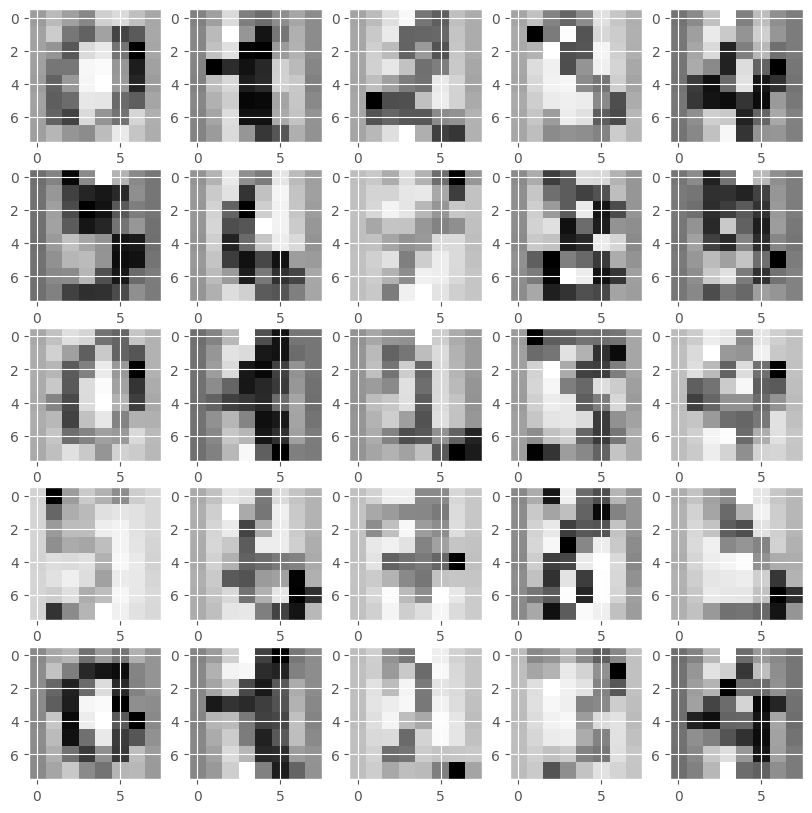

In [2]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

#### K-means clustering
Сначала мы используем метод k-средних для кластеризации набора данных и вычисления показателя однородности для кластеризации.

In [3]:
# fit k-means to data
kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

0.6016125702002288

#### Упражнение: Иерархическая кластеризация
Используйте метод иерархической кластеризации для кластеризации набора данных. Снова вычислите однородность.

*Подсказка:* Используйте функцию scikit-learn *AgglomerativeClustering*.

***источник:https://scikit-learn.ru/clustering/***

Иерархическая кластеризация — это общее семейство алгоритмов кластеризации, которые создают вложенные кластеры путем их последовательного слияния или разделения. Эта иерархия кластеров представлена ​​в виде дерева (или дендрограммы). Корень дерева — это уникальный кластер, который собирает все образцы, а листья — это кластеры только с одним образцом.

In [30]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [31]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Homogeneity Score: 0.7584914070326005


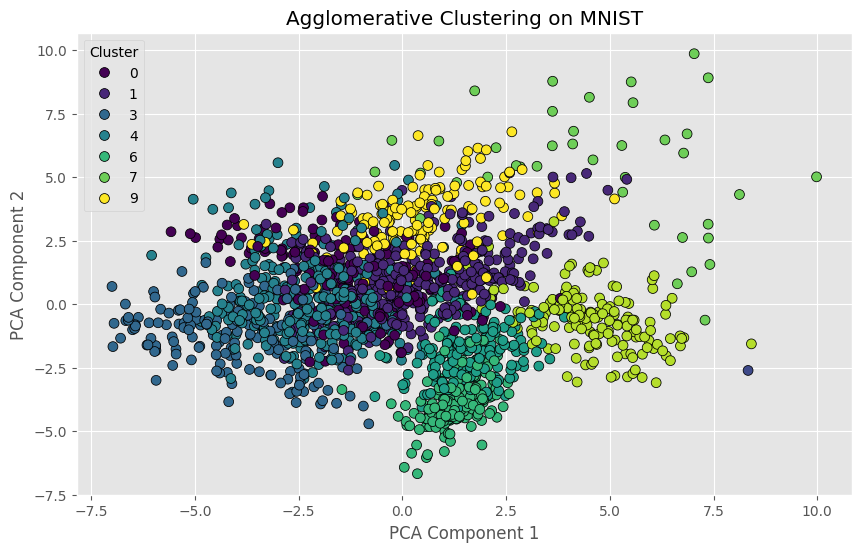

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Загрузка набора данных MNIST
digits = load_digits()
X = digits.data
y = digits.target
n_digits = len(np.unique(y))
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Применение метода иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=n_digits)
labels = agg_clustering.fit_predict(X_scaled)
# Вычисление показателя однородности
homogeneity = metrics.homogeneity_score(labels_true=y, labels_pred=labels)
print(f"Homogeneity Score: {homogeneity}")
# Визуализация кластеризации с использованием PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', edgecolor='k', s=50)
plt.title('Agglomerative Clustering on MNIST')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


**Можно визуализировать дерево, представляющее иерархическое слияние кластеров, в виде дендрограммы.**

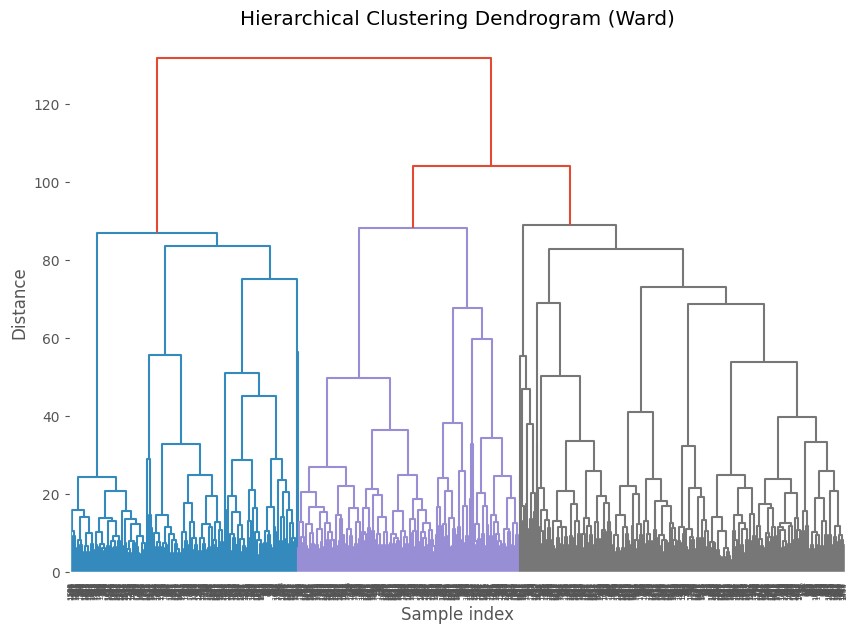

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
# Загрузка набора данных MNIST
digits = load_digits()
X = digits.data
y = digits.target
# Масштаб данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Применение метода иерархической кластеризации с использованием linkage
Z = linkage(X_scaled, method='ward')
# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='level', p=30)
plt.show()


#### Упражнение: DBScan

Используйте DBScan для кластеризации набора данных. Проблема, с которой вы столкнетесь, — это выбор $\epsilon$. Вы можете использовать функцию DistanceMetric, чтобы получить представление о типичных расстояниях между точками.

In [9]:
import pandas as pd
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
distances = dist.pairwise(X)
distances
df = pd.DataFrame(distances)
df.describe()

# Ваш код

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,45.896434,47.872019,49.604193,45.799419,51.709576,47.697507,46.965429,52.257013,46.011325,47.972642,...,46.154358,52.273233,49.436287,45.668686,51.146394,45.482752,48.857515,46.557604,45.660677,46.070613
std,9.351545,7.803323,6.261607,7.800390,7.526242,7.582993,8.450644,7.454934,5.907626,5.651600,...,7.037128,8.935143,7.212848,6.949663,9.379893,8.865198,8.994366,6.583114,6.999737,6.323898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.860238,44.474712,46.043458,41.533119,48.052055,43.255058,42.047592,48.569538,42.965102,44.362146,...,41.785165,47.906158,45.661800,41.327957,46.518813,39.179076,45.254834,42.871902,41.036569,42.023803
50%,47.381431,48.815981,50.249378,46.615448,52.820451,48.321838,47.947888,53.581713,46.346521,48.425200,...,47.233463,53.907328,50.398413,46.378875,52.230259,47.031904,50.119856,47.465777,45.923850,46.270941
75%,51.961524,52.952809,53.870214,51.215232,56.833089,53.366656,53.056574,57.645468,49.899900,51.913389,...,51.146847,58.804762,54.405882,51.009803,58.249464,52.801515,54.845237,51.078371,51.088159,50.418251
max,63.356136,66.603303,65.482822,62.992063,67.126746,66.535705,64.699304,66.565757,62.856981,62.896741,...,67.438861,67.786429,69.144776,61.919302,69.649121,63.285069,67.490740,62.553977,63.277168,64.884513


***источник: https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/***

Homogeneity Score: 0.008001793680829693
Completeness Score: 0.11315756959135072
V-Measure Score: 0.014946653743302087


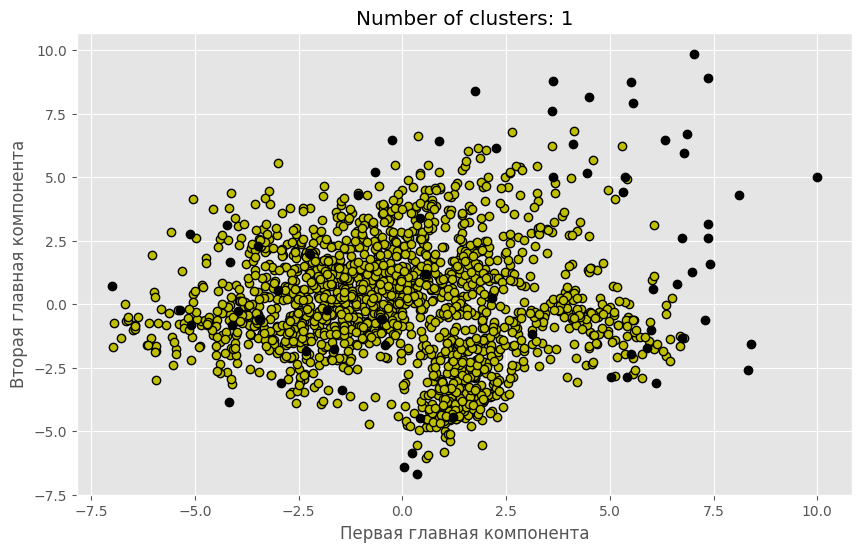

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
# Загрузка набора данных MNIST
digits = load_digits()
X = digits.data
y = digits.target
# Масштабирование данных
X_scaled = StandardScaler().fit_transform(X)
# Вычисление евклидовых расстояний между точками
distances = np.linalg.norm(X_scaled[:, np.newaxis] - X_scaled, axis=2)
# Анализ распределения расстояний
nearest_distances = np.sort(distances, axis=1)[:, 1:6].mean(axis=1)
eps = np.percentile(nearest_distances, 95)
# Применение DBSCAN с выбранным значением eps
dbscan = DBSCAN(eps=eps, min_samples=5, metric='euclidean')
labels = dbscan.fit_predict(X_scaled)
# Вычисление показателей качества кластеризации
homogeneity = homogeneity_score(y, labels)
completeness = completeness_score(y, labels)
v_measure = v_measure_score(y, labels)
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}")
# Применение PCA для снижения размерности для визуализации
X_pca = PCA(n_components=2).fit_transform(X_scaled)
# Визуализация результатов
core_samples_mask = dbscan.core_sample_indices_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

plt.figure(figsize=(10, 6))
colors = ['y', 'b', 'g', 'r', 'c', 'm']
for k, col in zip(set(labels), colors):
    if k == -1:
        col = 'k'
    plt.plot(X_pca[labels == k, 0], X_pca[labels == k, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title(f'Number of clusters: {n_clusters_}')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()


**Значения, близкие к 0, обозначают перекрывающиеся кластеры.**

Попробуем изменить eps

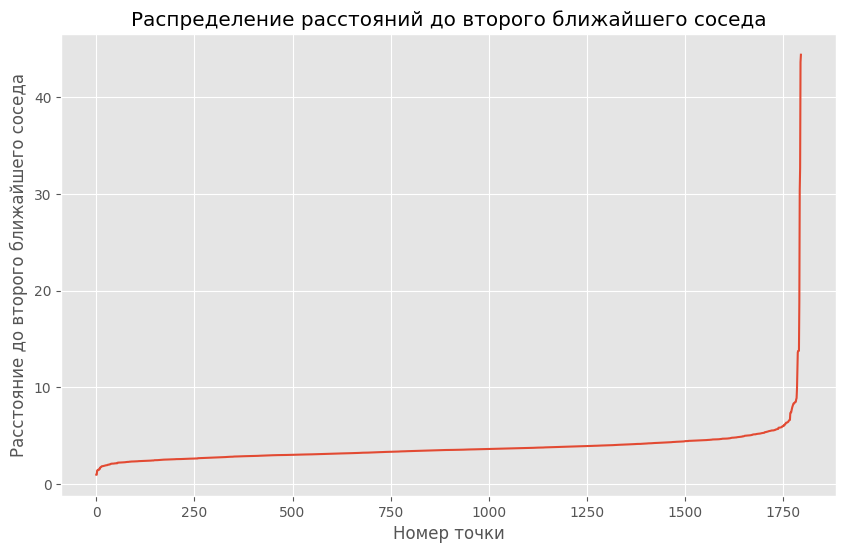

In [37]:
from sklearn.neighbors import NearestNeighbors
# Найдем расстояния до k=2 ближайших соседей каждой точки
k = 2
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
# Отсортируем расстояния и посмотрим на их распределение
sorted_distances = np.sort(distances[:, 1])
plt.plot(sorted_distances)
plt.xlabel('Номер точки')
plt.ylabel('Расстояние до второго ближайшего соседа')
plt.title('Распределение расстояний до второго ближайшего соседа')
plt.show()

Homogeneity Score: 0.6053015041419647
Completeness Score: 0.6205355427600725
V-Measure Score: 0.6128238632622095


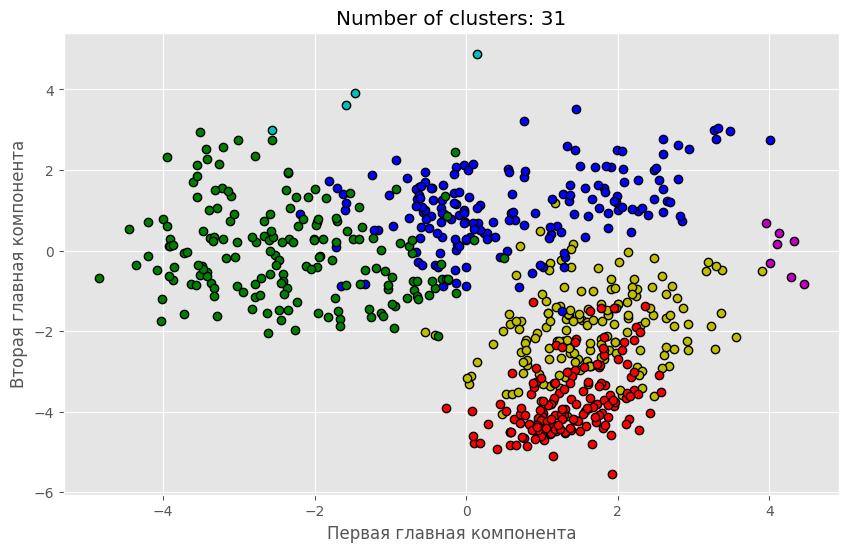

In [44]:
# Вычисление евклидовых расстояний между точками
distances = np.linalg.norm(X_scaled[:, np.newaxis] - X_scaled, axis=2)
# Анализ распределения расстояний
nearest_distances = np.sort(distances, axis=1)[:, 1:6].mean(axis=1)
eps = 4
# Применение DBSCAN с выбранным значением eps
dbscan = DBSCAN(eps=eps, min_samples=4, metric='euclidean')
labels = dbscan.fit_predict(X_scaled)
# Вычисление показателей качества кластеризации
homogeneity = homogeneity_score(y, labels)
completeness = completeness_score(y, labels)
v_measure = v_measure_score(y, labels)
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}")
# Применение PCA для снижения размерности для визуализации
X_pca = PCA(n_components=2).fit_transform(X_scaled)
# Визуализация результатов
core_samples_mask = dbscan.core_sample_indices_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plt.figure(figsize=(10, 6))
colors = ['y', 'b', 'g', 'r', 'c', 'm']
for k, col in zip(set(labels), colors):
    if k == -1:
        col = 'k'
    plt.plot(X_pca[labels == k, 0], X_pca[labels == k, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title(f'Number of clusters: {n_clusters_}')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()


Лучшее качество модели при eps = 4  и min_samples = 4

## MNIST: Другие методы кластеризации
Ознакомьтесь с методами кластеризации и опциями различных методов на [странице scikit-learn](http://scikit-learn.org/stable/modules/clustering.html).

**Упражнение.** Изменив следующий код, попытайтесь найти для этого метод кластеризации с наибольшим показателем однородности.

In [28]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, OPTICS, MeanShift, AffinityPropagation, SpectralClustering
from time import time
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

# K-means++
method = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means++", data=X)
# K-means random
method = KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means random", data=X)
# Agglomerative Clustering
method = AgglomerativeClustering(n_clusters=n_digits)
compare_method(estimator=method, name="Agglomerative Clustering", data=X)
# DBSCAN
method = DBSCAN()
compare_method(estimator=method, name="DBSCAN", data=X)
# Birch
method = Birch(n_clusters=n_digits)
compare_method(estimator=method, name="Birch", data=X)
# OPTICS
method = OPTICS()
compare_method(estimator=method, name="OPTICS", data=X)
# MeanShift
method = MeanShift()
compare_method(estimator=method, name="MeanShift", data=X)
# Affinity Propagation
method = AffinityPropagation()
compare_method(estimator=method, name="Affinity Propagation", data=X)

__________________________________________________
   method                   time      homo
                k-means++   3.11s     0.737 
           k-means random   2.21s     0.738 
 Agglomerative Clustering   0.13s     0.858 
                   DBSCAN   0.03s     0.000 
                    Birch   0.27s     0.858 
                   OPTICS   2.31s     0.284 
                MeanShift   11.45s     0.000 
     Affinity Propagation   2.57s     0.959 


***не смотря на долго выполнение у Affinity Propagation высокое значение однородности,также можно выделить Agglomerative Clustering с минимальным временем и высоким значение однородности***